<a href="https://colab.research.google.com/github/markovicstrahinja/ML_NMR/blob/master/Model%20Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

!pip install scikit-learn==0.20.1

#### Download [Github repository](https://github.com/markovicstrahinja/ML_NMR), go to its working directory and upload necessary imports.

In [4]:
TRAIN_DATA_PATH = 'data/train_data.csv'
TEST_DATA_PATH = 'data/test_data.csv'
MODEL_PATH = 'models/svr_model_weights.joblib'

working_path = 'ML_NMR'
current_path = os.getcwd()

if current_path.endswith(working_path):
    print('Repository is already cloned. Working directory is OK.')
elif os.path.exists(working_path):
    print('Repository is already cloned. Go to working directory.')
    os.chdir(os.path.join(current_path, working_path))
else:
    print('Clone repository and go to its working directory.')
    !git clone https://github.com/markovicstrahinja/ML_NMR
    os.chdir(os.path.join(current_path, working_path))

current_path = os.getcwd()
print('Working Directory:', current_path)

Repository is already cloned. Go to working directory.
Working Directory: /content/ML_NMR


#### Load data

In [12]:
from src.data_manager import DataManager

train_data = DataManager(
    data_path=TRAIN_DATA_PATH, 
    log_target=True, add_fe=True
)

test_data = DataManager(
    data_path=TEST_DATA_PATH, 
    log_target=True, add_fe=True
)

--------------------
RESULT:
	RMSE: 5418.5
	MAE:  1671.2
	MSLE: 0.2575
	MAPE: 50.750
	AR2:  0.9621


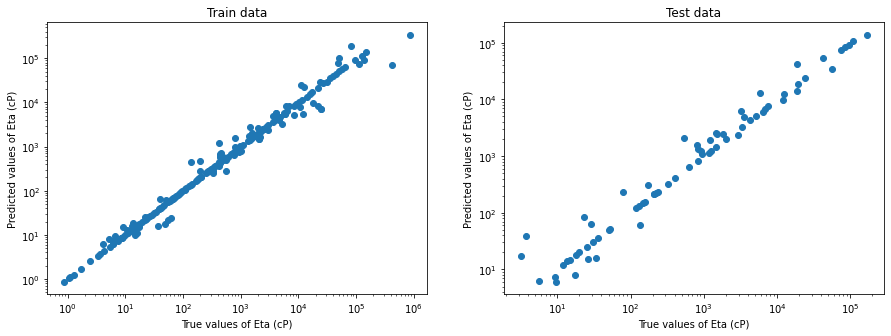

In [20]:
from src.model import Model
from src.utils import calc_metrics, plot_scatter

model = Model(MODEL_PATH)
y_pred_train = model.predict(train_data.X)
y_pred_test = model.predict(test_data.X)

print(calc_metrics(test_data.y, y_pred_test, len(test_data.X_cols)))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plot_scatter(train_data.y, y_pred_train)
plt.title('Train data')

plt.subplot(1,2,2)
plot_scatter(test_data.y, y_pred_test)
plt.title('Test data');